# <h1 align="center">TP5 Runge-Kutta methods</h1> 

In [13]:
import numpy as np
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import Legend
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, FloatSlider
output_notebook(hide_banner=True)
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# Context

We are concerned with solving the following Initial Value Problem (IVP):
\begin{equation}
\left\{
\begin{aligned}
x^\prime(t)&=f\left(t,x(t)\right), \quad t\geq t_0\\
x(t_0)&= x_0
\end{aligned}
\right.
\end{equation}
with $x : t \mapsto x(t) \in \mathbb{R}^m$, $m \in \mathbb{N}^*$, $x_0\in\mathbb{R}^m$.

It is assumed that the considered IVP admits a unique solution on some interval $[t_0,t_f]$ with $t_f>t_0$.

To approximate the solution of this IVP, last time we considered Linear Multistep Methods (LMM). In this notebook we focus on implementing and testing some Runge-Kutta methods.

**Part I** is devoted to the implementation of specific Runge-Kutta methods and testing their order of convergence. **Part II** is centered on the study of the regions of stability of the methods presented in part I. **Part III** is an application of these methods to a physical problem.

# Part I: Implementation and order of convergence

Throughout this notebook, we will consider the IVP above with $m=1$ and 
$$
\begin{aligned}
f(t,x) &= (1-3t/2)x,&& x(t_0) = 1.
\end{aligned}
$$

**Q1. Give the exact solution and implement it.**

*Please write your answer here.*

In [14]:
################
#To be completed
################

def f(t, x):
    return np.zeros(np.shape(x))

def x_exa(t, t_0):
    return np.zeros(np.shape(x))

We recall an implementation of the Euler method (RK1):

In [15]:
def Euler(f, t0, tf, h, x0):
    
    nt = int(round((tf-t0)/h))+1 #number of columns of the output array
    t = t0 #initial time
    x = np.zeros((nt,))
    x[0] = x0 #initial value
    it = 0

    for it in range(nt-1):
        x[it+1] = x[it] + h*f(t0+it*h,x[it]) 

    return x

We want to implement the following methods:
* Two-stage explicit Runge-Kutta (RK2) method defined by:
$$
\begin{aligned}
k_1 &= f(t_n,x_n)\\
k_2 &= f\left(t_n+\frac{1}{2}h,x_n+\frac{1}{2}hk_1\right)\\
x_{n+1} &= x_n + h k_2
\end{aligned}
$$
* Two-stage implicit Runge-Kutta method (ImpRK2) method defined by:
$$
\begin{aligned}
k_1 &= f\left(t_n + \left(\frac{1}{2}-\gamma\right)h, x_n + \frac{1}{4} h k_1 + \left(\frac{1}{4}-\gamma\right) h k_2\right)\\
k_2 &= f\left(t_n + \left(\frac{1}{2}+\gamma\right)h, x_n + \left(\frac{1}{4}+\gamma\right)h k_1 + \frac{1}{4} h k_2\right)\\
x_{n+1} &= x_n + \frac{1}{2} h(k_1+k_2)
\end{aligned}
$$
with $\gamma = \frac{\sqrt{3}}{6}$
* Four-stage explicit Runge-Kutta method (RK4) defined by:
$$
\begin{aligned}
k_1 &= f(t_n,x_n)\\
k_2 &= f\left(t_n+\frac{1}{2}h,x_n+\frac{1}{2}hk_1\right)\\
k_3 &= f\left(t_n+\frac{1}{2}h,x_n+\frac{1}{2}hk_2\right)\\
k_4 &= f\left(t_n+h,x_n+hk_3\right)\\
x_{n+1} &= x_n + h \left(\frac{1}{6}k_2+\frac{1}{3}k_3+\frac{1}{3}k_4+\frac{1}{6}k_1\right)
\end{aligned}
$$

**Q2. Implement the three methods.**

In [16]:
def RK2(f,t0,tf,h,x0):
    """Return the vector containing the approximate values xn at times tn=t0+n*h, using RK2
    
    Parameters
    ----------
    f  : left-hand side function corresponding to the studied IVP
    t0 : initial time
    tf : final time
    h  : step size
    x0 : starting value x(t0)
    
    Returns
    -------
    x : vector of the nt values xn, with nt = int(round((tf-t0)/h))+1
    """
    nt = int(round((tf-t0)/h))+1 #number of columns of the output array
    x = np.zeros((nt,))
    
    ####################################################################
    # To be completed
    ####################################################################
    
    return x

In [17]:
def ImpRK2(f,t0,tf,h,x0):
    """Return the vector containing the approximate values xn at times tn=t0+n*h, using ImpRK2
    
    Parameters
    ----------
    f  : left-hand side function corresponding to the studied IVP
    t0 : initial time
    tf : final time
    h  : step size
    x0 : starting value x(t0)
    
    Returns
    -------
    x : vector of the nt values xn, with nt = int(round((tf-t0)/h))+1
    """
    nt = int(round((tf-t0)/h))+1 #number of columns of the output array
    x = np.zeros((nt,))
    
    ####################################################################
    # To be completed
    ####################################################################
    
    return x

In [18]:
def RK4(f,t0,tf,h,x0):
    """Return the vector containing the approximate values xn at times tn=t0+n*h, using RK4
    
    Parameters
    ----------
    f  : left-hand side function corresponding to the studied IVP
    t0 : initial time
    tf : final time
    h  : step size
    x0 : starting value x(t0)
    
    Returns
    -------
    x : vector of the nt values xn, with nt = int(round((tf-t0)/h))+1
    """
    nt = int(round((tf-t0)/h))+1 #number of columns of the output array
    x = np.zeros((nt,))
    
    ####################################################################
    # To be completed
    ####################################################################
    
    return x

**Q3. Validate your code by displaying the exact solution and the numerical ones. Take $t_0=0$, $t_1 = 4$, $h=0.2$.**

In [19]:
#################
#To be completed
#################

**Q4. Check the order of convergence of RK2, ImpRK2 and RK4 for the $\ell^\infty$-norm. Comments your results.**

In [20]:
#################
#To be completed
#################

# Part II: Region of absolute stability 

To study the absolute stability of the above methods, we consider as usual the test problem 
\begin{equation}
\left\{
\begin{aligned}
x^\prime(t)&=\lambda x(t), \quad t\geq 0\\
x(0)&= 1
\end{aligned}
\right.
\end{equation}
with $\lambda\in\mathbb{C}$. Applying the RK methods to this problem, we get relations of the form $x_{n+1}=R(h\lambda)x_n$ where  $R(h\lambda)$ is the so-called stability function. The region of absolute stability of a scheme is then defined as the set $\{\hat{h}\in\mathbb{C}\,|\,R(\hat{h})<1\}$.

We recall the stability functions of the following methods:
* Euler (Runge-Kutta 1):
$$
R_1\left(\hat{h}\right) = 1+\hat{h}
$$
* Runge-Kutta 4:
$$
R_4\left(\hat{h}\right) = 1+\hat{h}+\frac{1}{2}\hat{h}^2+\frac{1}{6}\hat{h}^3+\frac{1}{24}\hat{h}^4
$$

**Q5. Compute the stability functions of the RK2 and implicit RK2 methods**

*Please write your answer here*

**Q6. Display the regions of absolute stability of RK2, ImpRK2 and RK4**

C:\Users\PRINCI~1\AppData\Local\Temp/ipykernel_12720/3386622044.py:44: UserWarning: No contour levels were found within the data range.
  ax2.contour(x, y, output_rk2, colors='k')
C:\Users\PRINCI~1\AppData\Local\Temp/ipykernel_12720/3386622044.py:65: UserWarning: No contour levels were found within the data range.
  ax3.contour(x, y, output_impRk2, colors='k')
C:\Users\PRINCI~1\AppData\Local\Temp/ipykernel_12720/3386622044.py:85: UserWarning: No contour levels were found within the data range.
  ax4.contour(x, y, output_rk4, colors='k')


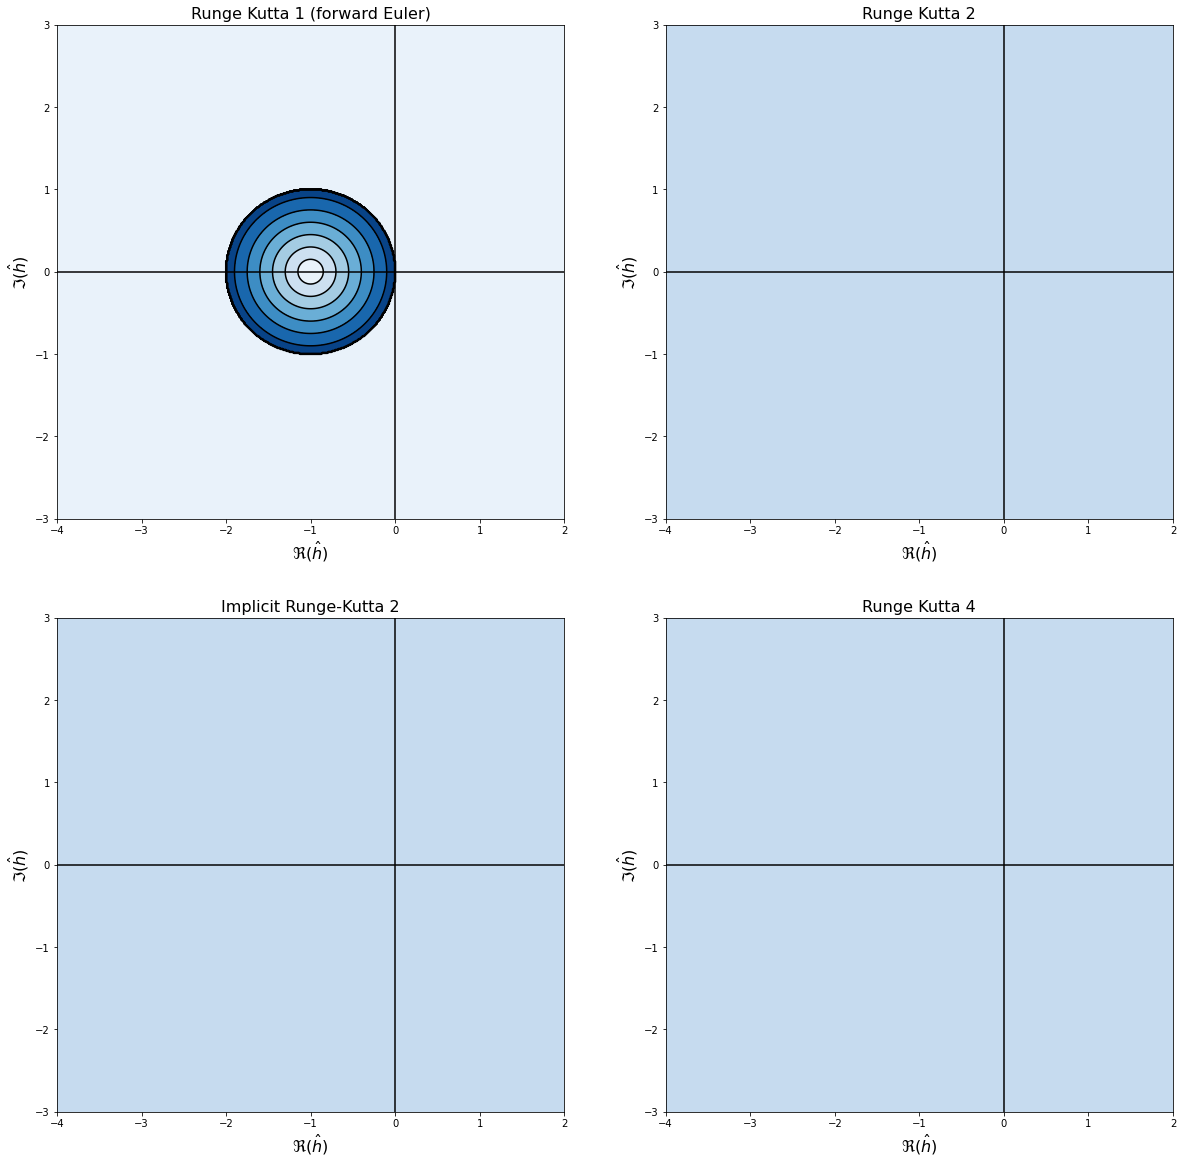

In [21]:
#Adapted from a notebook by Laurent Series for the course MAP551, 3rd year of the ingineering cycle at Ecole polytechnique.

x = np.linspace(-4, 2, 500)
y = np.linspace(-3, 3, 500)

z = x + 1j*y[:, np.newaxis]

fig_rk, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# forward euler
euler = z + 1
output_euler = np.zeros_like(z, dtype = np.double)
mask = np.abs(euler)<=1
output_euler[mask] = np.abs(euler[mask])

plt.subplot(2, 2, 1)
plt.title('Runge Kutta 1 (forward Euler)', fontsize=16)
plt.xlabel('$\Re(\hat{h})$',fontsize=16)
plt.ylabel('$\Im(\hat{h})$',fontsize=16)
ax1 = fig_rk.gca()
ax1.axvline(x=0, color='k')
ax1.axhline(y=0, color='k')
ax1.contourf(x, y, output_euler, cmap='Blues')
ax1.contour(x, y, output_euler, colors='k')


# RK2

########################################################
rk2 = 0.*z #To be completed
########################################################

output_rk2 = np.zeros_like(z, dtype = np.double)
mask = np.abs(rk2)<=1
output_rk2[mask] = np.abs(rk2[mask])

plt.subplot(2, 2, 2)
plt.title('Runge Kutta 2', fontsize=16)
plt.xlabel('$\Re(\hat{h})$',fontsize=16)
plt.ylabel('$\Im(\hat{h})$',fontsize=16)
ax2 = fig_rk.gca()
ax2.axvline(x=0, color='k')
ax2.axhline(y=0, color='k')
ax2.contour(x, y, output_rk2, colors='k')
ax2.contourf(x, y, output_rk2, cmap='Blues')

# ImpRK2

########################################################
impRk2 = 0.*z #To be completed
########################################################

output_impRk2 = np.zeros_like(z, dtype = np.double)
mask = np.abs(impRk2)<=1
output_impRk2[mask] = np.abs(impRk2[mask])

plt.subplot(2, 2, 3)
plt.title('Implicit Runge-Kutta 2', fontsize=16)
plt.xlabel('$\Re(\hat{h})$',fontsize=16)
plt.ylabel('$\Im(\hat{h})$',fontsize=16)
ax3 = fig_rk.gca()
ax3.axvline(x=0, color='k')
ax3.axhline(y=0, color='k')
ax3.contourf(x, y, output_impRk2, cmap='Blues')
ax3.contour(x, y, output_impRk2, colors='k')

# RK4

########################################################
rk4 = 0.*z #To be completed
########################################################

output_rk4 = np.zeros_like(z, dtype = np.double)
mask = np.abs(rk4)<=1
output_rk4[mask] = np.abs(rk4[mask])

plt.subplot(2, 2, 4)
plt.title('Runge Kutta 4', fontsize=16)
plt.xlabel('$\Re(\hat{h})$',fontsize=16)
plt.ylabel('$\Im(\hat{h})$',fontsize=16)
ax4 = fig_rk.gca()
ax4.axvline(x=0, color='k')
ax4.axhline(y=0, color='k')
ax4.contourf(x, y, output_rk4, cmap='Blues')
ax4.contour(x, y, output_rk4, colors='k')


plt.show()

**Q7. For $\lambda \in \mathbb{R}$, is there a gain in terms of absolute stability when using RK2 instead of the Euler method? Is there an A-stable method among the studied methods?**

*Please write your answer here*

# Part III: Application to a model problem

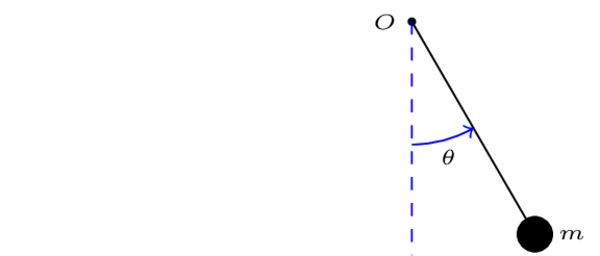

In [22]:
%%tikz -s 600,600 
\filldraw (0,0) circle (0.75pt) node[left] {\tiny $O$};
\draw (0,0)--(1,-1.73);
\filldraw (1,-1.73) circle (4pt);
\draw[color=blue,dashed] (0,0)--(0,-1.9);
\draw[->,blue] (0,-1) arc (270:300:1)  ;
\draw (0.3,-1.1) node {\tiny $\theta$};
\draw (1.3,-1.73) node {\tiny $m$};
\filldraw[white] (-3.2,0) circle (4pt);

Consider a mass $m$ attached to a light rod of length $\ell$. The other end of the rod is attached to a wall at a point $O$ so that the mass moves on a circle centered at $O$. The position of the mass at time $t$ is completely described by the angle $\theta(t)$ between the rod and the vertical line. Writing the Newton's Law, we obtain the second-order differential equation
$$
m\ell\ddot{\theta}=-\cfrac{\nu}{\ell}\dot{\theta}-mg\sin\theta,\quad t>0,
$$
where $\cfrac{\nu}{\ell}\dot{\theta}$ is a friction term ($\nu>0$) and $g$ is the magnitude of the gravitational field. We complement this ODE with the initial conditions
$$
\theta(0)=\theta_0,\qquad \dot{\theta}(0)=0.
$$

**Q8. Rewrite the above problem as the first-order system**
$$
(1)\quad\begin{array}{|l}
\dot{U}(t)=f(U(t)),\quad t>0,\\[2pt]
U(0)=U_0
\end{array}
$$
**where $U(t)=\left[\begin{array}{c}\theta(t) \\ \dot{\theta}(t)\end{array}\right]$. In particular, give the expression of $f:\mathbb{R}^2\to\mathbb{R}^2$.**


*Please write your answer here*

**Q9. Implement the explicit Euler method (RK1) as well as the two-stage implicit Runge-Kutta method (ImpRK2) to solve Problem (1).**



In [23]:
def euler_explicite(f, t0, tf, h, x0):
    
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    x0_array = np.array(x0)
    neq = x0_array.size

    x = np.zeros((neq, nt))
    x[:,0] = x0_array
    
    ####################################################################
    # To be completed
    ####################################################################

    return x

In [24]:
def ImpRK2Sys(f,t0,tf,h,x0):
    """Return the vector containing the approximate values xn at times tn=t0+n*h, using RK2
    
    Parameters
    ----------
    f  : left-hand side function corresponding to the studied IVP
    t0 : initial time
    tf : final time
    h  : step size
    x0 : starting value x(t0)
    
    Returns
    -------
    x : vector of the nt values xn, with nt = int(round((tf-t0)/h))+1
    """
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    x0_array = np.array(x0)
    neq = x0_array.size

    x = np.zeros((neq, nt))
    x[:,0] = x0_array
    
    it = 0    

    ####################################################################
    # To be completed
    ####################################################################
    
    return x

**Q10. Frictionless case ($\nu=0$).**

**i) Display the solutions for different values of $\theta_0$ and compare them with the one obtained when making the small angle approximation $\sin(\theta)\approx \theta$. Take $m=1$, $\ell=1$, $g=9.8$, $t_0=0$, $t_f=4$. Comment your results.**

*Please write your answer here*

In [25]:
##################
# To be completed
##################

**ii) Display the numerical solutions in the plane $\theta,\dot{\theta}$.**

In [ ]:
##################
# To be completed
##################

**iii) Show that the energy 
$$
E(t)=\cfrac{1}{2}\dot{\theta}(t)^2-\cfrac{g}{\ell}\cos(\theta(t))
$$
is preserved for all $t>0$. Is it true for your numerical schemes?**

*Please write your answer here*

In [10]:
##################
# To be completed
##################